<a href="https://colab.research.google.com/github/HassanDayoub/Machine-Learning/blob/master/Fake_News_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Fake News Detiction** (This Code belongs to [link text](https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/) ) 

## What is Fake News?

A type of yellow journalism, fake news encapsulates pieces of news that may be hoaxes and is generally spread through social media and other online media. This is often done to further or impose certain ideas and is often achieved with political agendas. Such news items may contain false and/or exaggerated claims, and may end up being viralized by algorithms, and users may end up in a filter bubble.

## What is a TfidfVectorizer?

**TF (Term Frequency):** The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

## What is a PassiveAggressiveClassifier?

Passive Aggressive algorithms are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.

## Detecting Fake News with Python – Objective

To build a model to accurately classify a piece of news as REAL or FAKE.

## Detecting Fake News with Python – About the Python Project

This advanced python project of detecting fake news deals with fake and real news. Using sklearn, we build a TfidfVectorizer on our dataset. Then, we initialize a PassiveAggressive Classifier and fit the model. In the end, the accuracy score and the confusion matrix tell us how well our model fares.

 

## The Dataset

The dataset we’ll use for this python project- we’ll call it news.csv. This dataset has a shape of 7796×4. The first column identifies the news, the second and third are the title and text, and the fourth column has labels denoting whether the news is REAL or FAKE. The dataset takes up 29.2MB of space and you can download it here : [link text](https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [19]:
!unzip '/content/drive/My Drive/Colab Notebooks/Machine Learning Course AI Club/news.zip' -d '/content/drive/My Drive/Colab Notebooks/Machine Learning Course AI Club'

Archive:  /content/drive/My Drive/Colab Notebooks/Machine Learning Course AI Club/news.zip
  inflating: /content/drive/My Drive/Colab Notebooks/Machine Learning Course AI Club/news.csv  


## Prerequisites

You’ll need to install the following libraries with pip:

In [0]:
!pip install numpy pandas sklearn

## Steps for detecting fake news with Python

Follow the below steps for detecting fake news : 

### 1. Make necessary imports:



In [0]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### 2. Now, let’s **read** the data into a **DataFrame**, and get the **shape** of the data and the first 5 records

In [21]:
#Read the data
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning Course AI Club/news.csv')
#Get shape and head
df.shape


(6335, 4)

### 3. And get the labels from the DataFrame :

In [22]:
#DataFlair - Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

### 4. Split the dataset into training and testing sets :

In [0]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

### 5. initialize a TfidfVectorizer :
Let’s initialize a [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with stop words from the English language and a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded). Stop words are the most common words in a language that are to be filtered out before processing the natural language data. And a TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.

In [0]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

Now, fit and transform the vectorizer on the train set, and transform the vectorizer on the test set.

In [0]:
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

### 6. initialize a PassiveAggressiveClassifier:

Next, we’ll initialize a [PassiveAggressiveClassifier](https://en.wikipedia.org/wiki/Online_machine_learning). This is. We’ll fit this on tfidf_train and y_train.

In [26]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

Then, we’ll predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score() from sklearn.metrics.

In [27]:
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.82%


### 7. Confusion matrix : 

 Finally, let’s print out a [confusion matrix](geeksforgeeks.org/confusion-matrix-machine-learning/) to gain insight into the number of false and true negatives and positives.

In [34]:
#DataFlair - Build confusion matrix
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
cm

array([[591,  47],
       [ 44, 585]])

So with this model, we have 589 true positives, 587 true negatives, 42 false positives, and 49 false negatives.

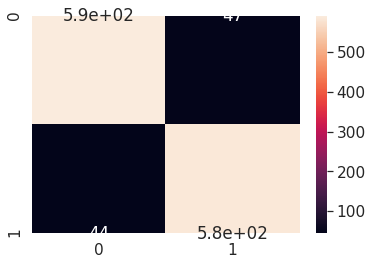

In [38]:
sn.set(font_scale=1.4 )#for label size
sn.heatmap(cm,annot=True)
plt.show()